<a href="https://colab.research.google.com/github/Nikerlas/AI/blob/main/AI_NeuralNetworkRegresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd

In [12]:
file="concrete_data.csv"
df=pd.read_csv(file)
df.head(6)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


In [13]:
df.isna().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [14]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [16]:
import seaborn as sns

<Axes: >

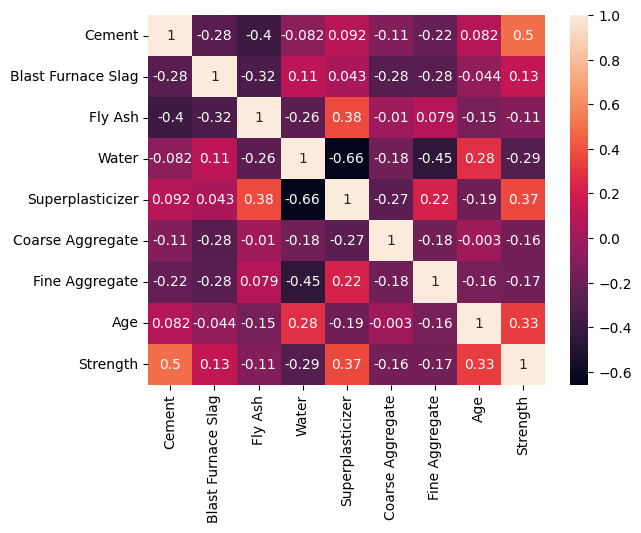

In [17]:
sns.heatmap(df.corr(), annot=True)

In [22]:
# Menghapus outlier menggunakan metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

df_cleaned = df[~((df < batas_bawah) | (df > batas_atas)).any(axis=1)]
print("Dimensi dataset setelah pembersihan outlier:", df_cleaned.shape)

df_cleaned_ready = df_cleaned.drop(columns=['Blast Furnace Slag', 'Fly Ash', 'Coarse Aggregate', 'Fine Aggregate'])

Dimensi dataset setelah pembersihan outlier: (941, 9)


In [26]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [27]:
X = df_cleaned_ready.drop(columns=["Strength"])
y = df_cleaned_ready["Strength"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [29]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [30]:
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


In [31]:
model = MLPRegressor(
    random_state=1,
    max_iter=5000,
    hidden_layer_sizes=(100, 50, 25, 10),
    learning_rate="adaptive",
    learning_rate_init=0.001,
    activation='relu',
    alpha=0.001,
    batch_size=32
)

In [32]:
model.fit(X_train_scaled, y_train_scaled.ravel())

MLPRegressor(alpha=0.001, batch_size=32, hidden_layer_sizes=(100, 50, 25, 10),
             learning_rate='adaptive', max_iter=5000, random_state=1)

In [34]:
predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))

In [35]:
print("\n=== Evaluasi Model (MLP Regressor) ===")
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R² Score:", r2_score(y_test, predictions))


=== Evaluasi Model (MLP Regressor) ===
Mean Squared Error: 65.89105853075385
R² Score: 0.7420172472634063


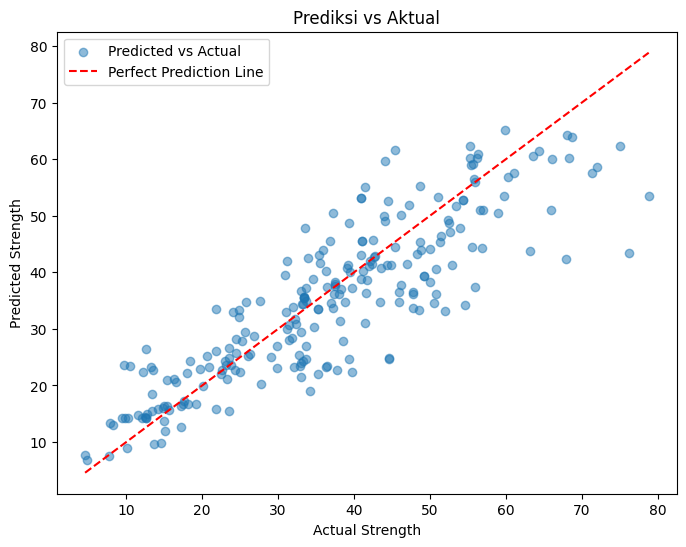

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Prediksi vs Aktual")
plt.legend()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
X = df_cleaned_ready.drop(columns=["Strength"]).values
y = df_cleaned_ready["Strength"].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [40]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [41]:
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [42]:
model = KernelRidge(alpha=0.1, kernel='rbf', gamma=0.5)

In [43]:
model.fit(X_train_scaled, y_train_scaled.ravel())

KernelRidge(alpha=0.1, gamma=0.5, kernel='rbf')

In [44]:
predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))

In [45]:
print("\n=== Evaluasi Model (Kernel Ridge) ===")
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R² Score:", r2_score(y_test, predictions))


=== Evaluasi Model (Kernel Ridge) ===
Mean Squared Error: 63.382587281140864
R² Score: 0.7518386453797186


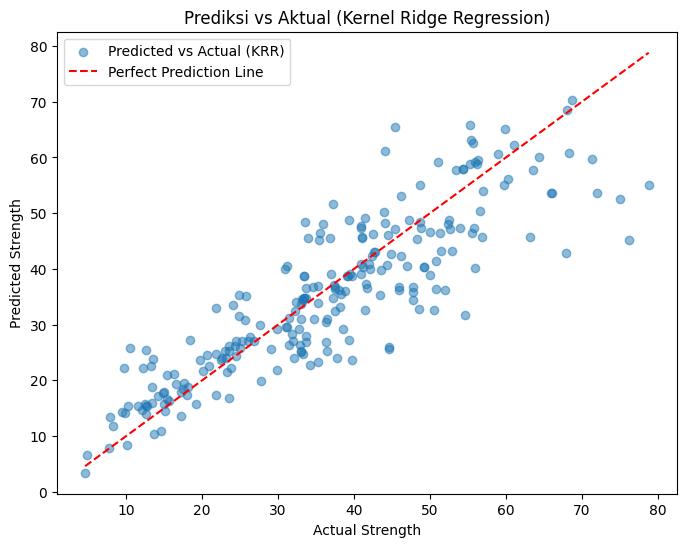

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, label="Predicted vs Actual (KRR)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Prediksi vs Aktual (Kernel Ridge Regression)")
plt.legend()
plt.show()